In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt




In [19]:
# Load the dataset
df  = pd.read_csv('room_occupay.csv')
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
1,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
2,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
3,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
4,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [20]:
# Some values have many decimal places, so I will round them to 2 but humidity rate will be rounded to 5
df = df.round({'Temperature': 2, 'Humidity': 5, 'Light': 2, 'CO2': 2, 'HumidityRatio': 5})
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:00,23.70,26.272,585.20,749.20,0.00476,1
1,2015-02-02 14:19:59,23.72,26.290,578.40,760.40,0.00477,1
2,2015-02-02 14:21:00,23.73,26.230,572.67,769.67,0.00477,1
3,2015-02-02 14:22:00,23.72,26.125,493.75,774.75,0.00474,1
4,2015-02-02 14:23:00,23.75,26.200,488.60,779.00,0.00477,1


In [21]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20560 entries, 0 to 20559
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           20560 non-null  datetime64[ns]
 1   Temperature    20560 non-null  float64       
 2   Humidity       20560 non-null  float64       
 3   Light          20560 non-null  float64       
 4   CO2            20560 non-null  float64       
 5   HumidityRatio  20560 non-null  float64       
 6   Occupancy      20560 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 1.1 MB


In [22]:
# let's check for missing values
df.isnull().sum()

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

In [23]:
# let's check for  duplicates
df.duplicated().sum()

0

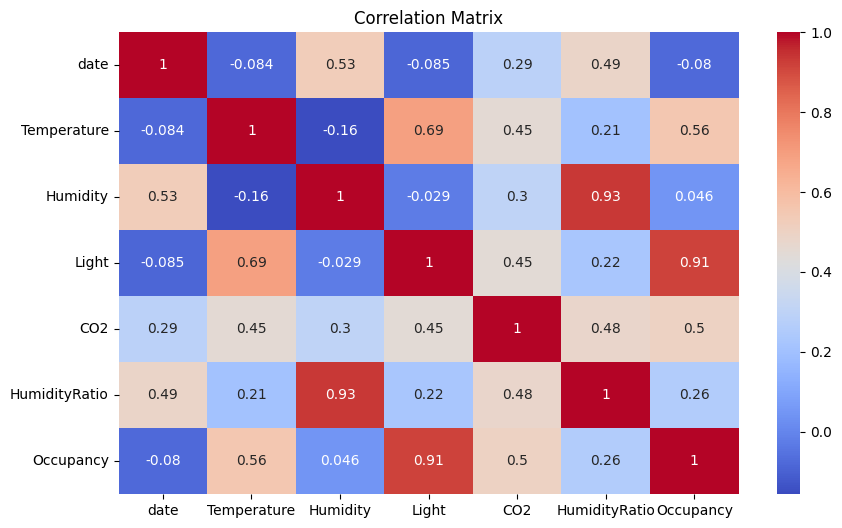

In [24]:
# let's find the correlation between the features
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [25]:
df = df.drop(['Light', 'HumidityRatio'], axis=1)

In [26]:
df.shape

(20560, 5)

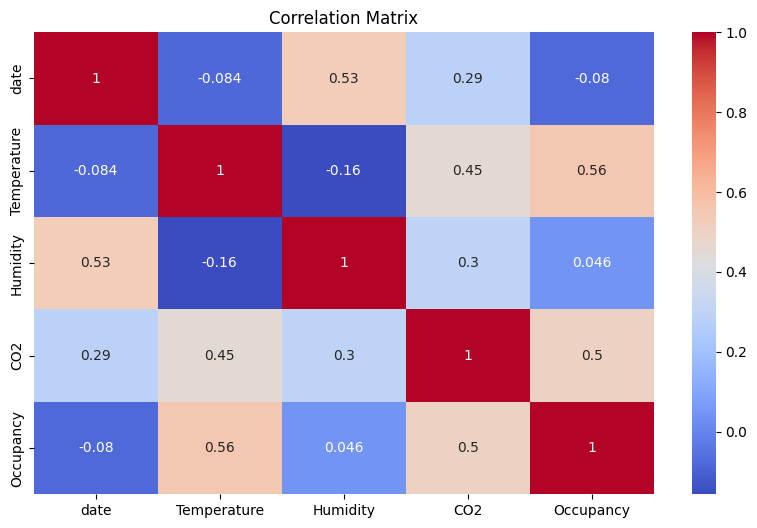

In [27]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

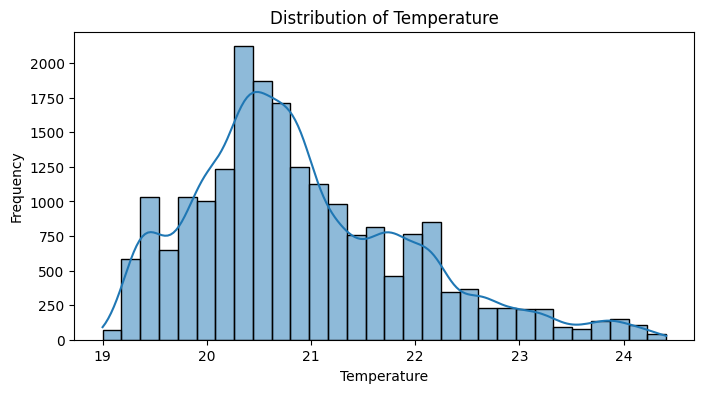

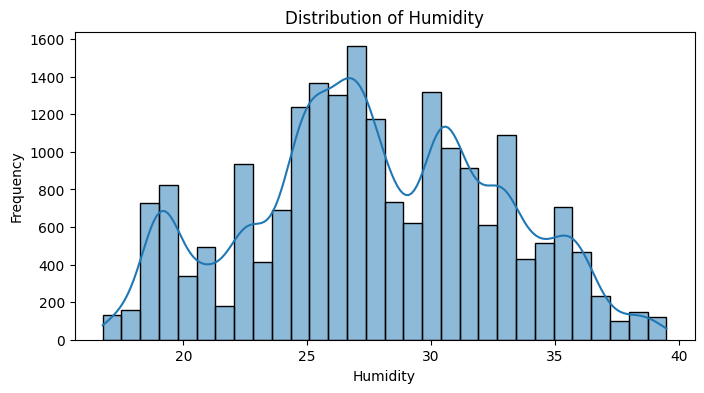

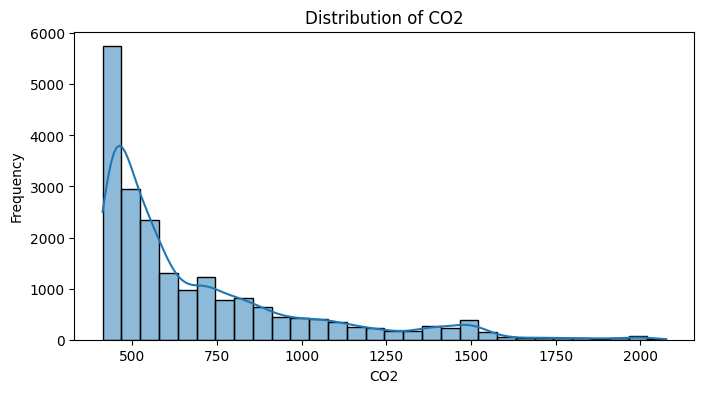

In [29]:
# Let's visualize the distribution of continuous columns
continuous_columns = ['Temperature', 'Humidity', 'CO2']
for col in continuous_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()